In [18]:
import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np

In [19]:
encoding_dim = 10  # This is the size of our encoded representations
# Encoder
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 RGB images
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output shape for RGB images
autoencoder = Model(input_img, decoded)


In [20]:
encoder = Model(input_img, encoded)
decoder = Model(encoded, decoded)  # Decoder model


In [21]:
encoded_input = Input(shape=(8, 8, 16))  # Adjust shape based on the encoded representation
decoder_output = decoder(encoded_input)
decoder_model = Model(encoded_input, decoder_output)

In [22]:
from tensorflow.keras.datasets import cifar10
# Load CIFAR-10 dataset
(train_images, _), (test_images, _) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True)


Epoch 1/5
391/391 [==============================] - 67s 167ms/step - loss: 0.5827
Epoch 2/5
391/391 [==============================] - 66s 169ms/step - loss: 0.5653
Epoch 3/5
391/391 [==============================] - 66s 169ms/step - loss: 0.5631
Epoch 4/5
391/391 [==============================] - 65s 165ms/step - loss: 0.5620
Epoch 5/5
391/391 [==============================] - 61s 156ms/step - loss: 0.5612


In [7]:
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder_model.predict(encoded_imgs)


313/313 [==============================] - 3s 9ms/step


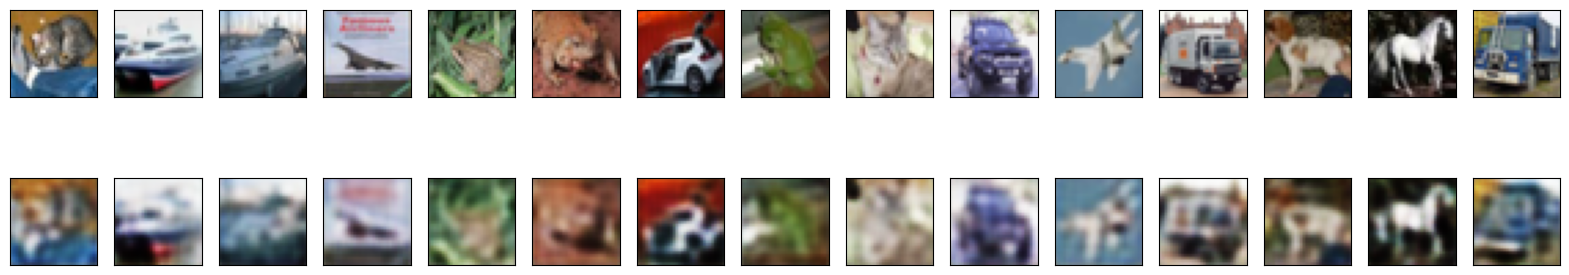

In [8]:
import matplotlib.pyplot as plt

n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [8]:
def add_gaussian_noise(images, noise_factor=0.1): #It controls how much the random Gaussian noise affects the images.
    mu = 0.5  # Set your desired mean
    sigma = 1.5  # Set your desired standard deviation
    noisy_images = images + noise_factor * (sigma * np.random.randn(*images.shape) + mu)
    #noisy_images = images + noise_factor * np.random.randn(*images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)  # Clip values to stay within [0, 1] range
    return noisy_images
(train_images, _), (test_images, _) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add Gaussian noise to train_images and test_images
noise_factor = 0.2  # Adjust the noise factor as needed
noisy_train_images = add_gaussian_noise(train_images, noise_factor)
noisy_test_images = add_gaussian_noise(test_images, noise_factor)

# Model compilation and training remain unchanged
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(noisy_train_images, train_images, epochs=5, batch_size=128, shuffle=True)

# Reconstruction using the trained autoencoder
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder_model.predict(encoded_imgs)



Epoch 1/5
391/391 [==============================] - 63s 157ms/step - loss: 0.5720
Epoch 2/5
391/391 [==============================] - 60s 154ms/step - loss: 0.5703
Epoch 3/5
391/391 [==============================] - 69s 176ms/step - loss: 0.5700
Epoch 4/5
391/391 [==============================] - 70s 179ms/step - loss: 0.5696
Epoch 5/5
313/313 [==============================] - 3s 9ms/step


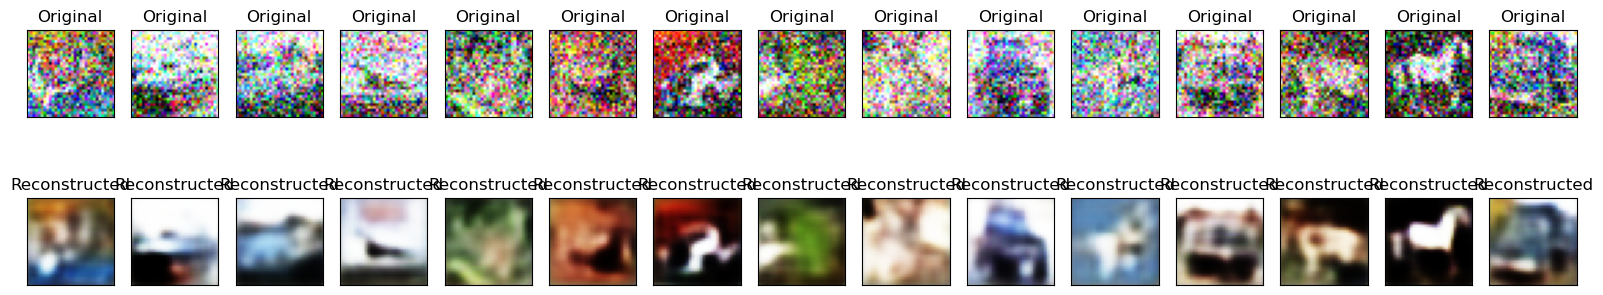

In [11]:
import matplotlib.pyplot as plt
# Plotting the original and reconstructed images
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()

In [14]:

(train_images, _), (test_images, _) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add Gaussian noise to train_images and test_images
noise_factor = 0.2  # Adjust the noise factor as needed
noisy_train_images = add_gaussian_noise(train_images, noise_factor)
noisy_test_images = add_gaussian_noise(test_images, noise_factor)

# Model compilation and training remain unchanged
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True)

# Reconstruction using the trained autoencoder
encoded_imgs = encoder.predict(noisy_test_images)
decoded_imgs = decoder_model.predict(encoded_imgs)



Epoch 1/5
391/391 [==============================] - 69s 173ms/step - loss: 0.5619
Epoch 2/5
391/391 [==============================] - 61s 155ms/step - loss: 0.5586
Epoch 3/5
391/391 [==============================] - 60s 154ms/step - loss: 0.5585
Epoch 4/5
391/391 [==============================] - 61s 156ms/step - loss: 0.5583
Epoch 5/5
313/313 [==============================] - 3s 9ms/step


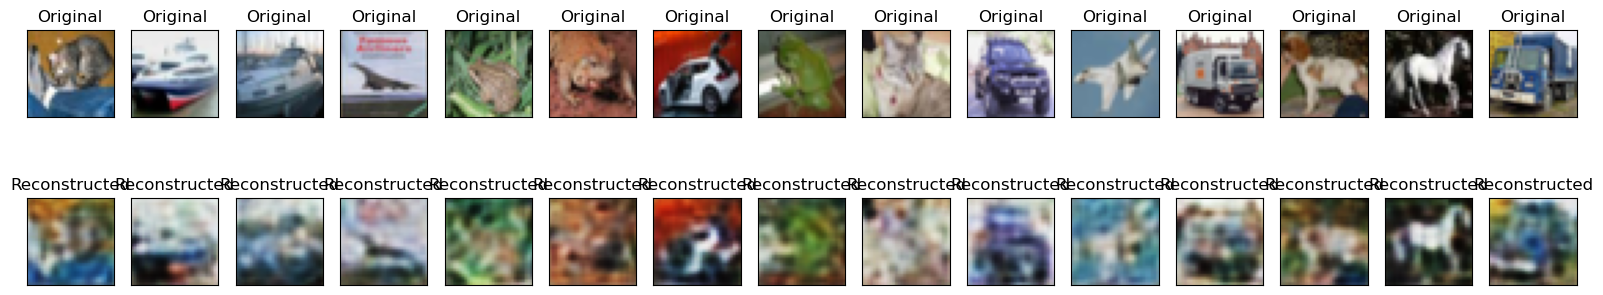

In [15]:
# Plotting the original and reconstructed images
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


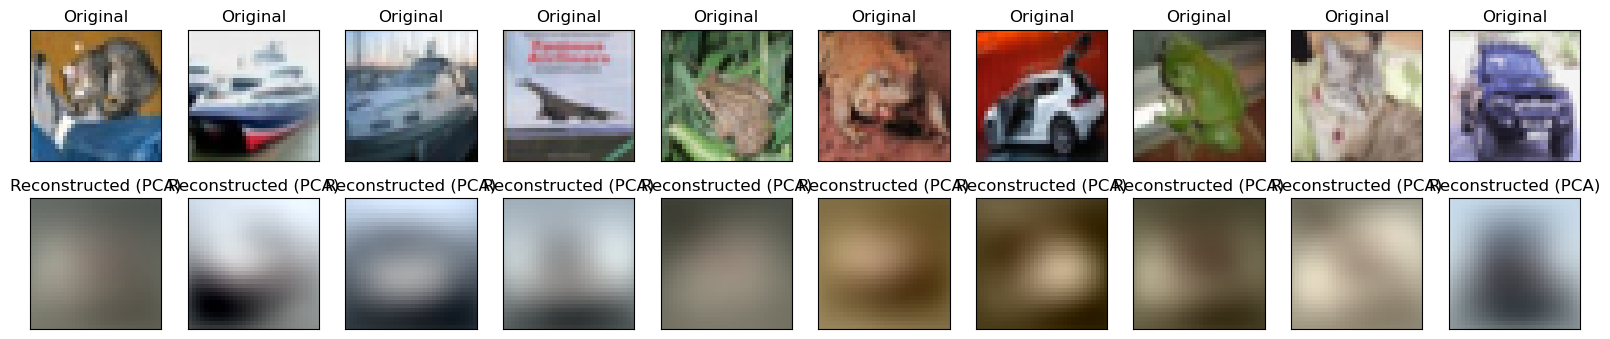

In [23]:
from sklearn.decomposition import PCA
import numpy as np

# Flatten the images for PCA
flattened_train_images = train_images.reshape((len(train_images), -1))
flattened_test_images = test_images.reshape((len(test_images), -1))

# Apply PCA on the flattened images
pca = PCA(n_components=encoding_dim)
pca.fit(flattened_train_images)

# Project the images onto the PCA components to get the encoded representation
encoded_pca_train = pca.transform(flattened_train_images)
encoded_pca_test = pca.transform(flattened_test_images)

# Reconstruct the images from the encoded representation
decoded_pca_train = pca.inverse_transform(encoded_pca_train)
decoded_pca_test = pca.inverse_transform(encoded_pca_test)

# Reshape the images to their original shape
decoded_pca_train = decoded_pca_train.reshape(train_images.shape)
decoded_pca_test = decoded_pca_test.reshape(test_images.shape)

# Visualize the denoised images using PCA
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_pca_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed (PCA)")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


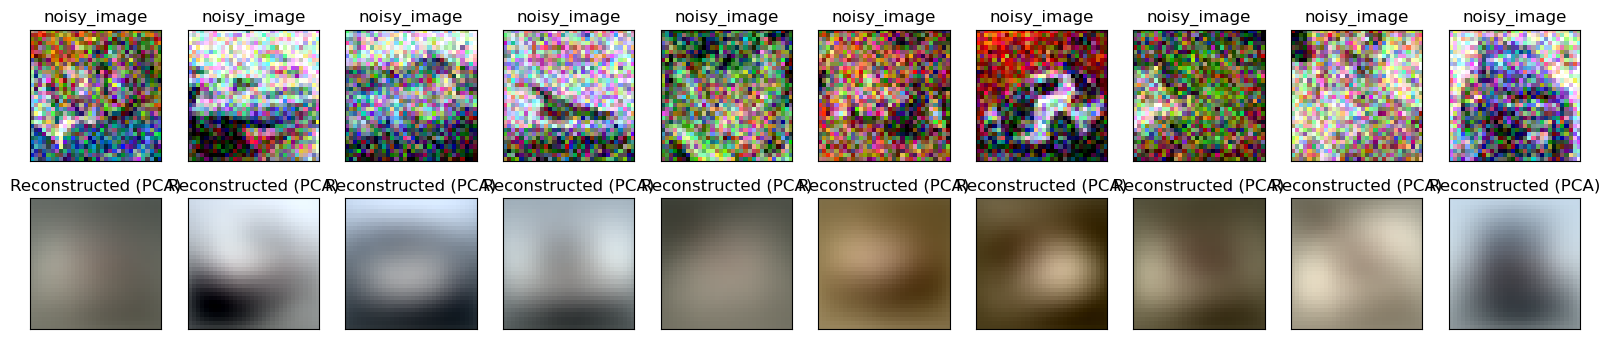

In [17]:
# Flatten the images for PCA
flattened_train_images = train_images.reshape((len(noisy_train_images), -1))
flattened_test_images = test_images.reshape((len(noisy_test_images), -1))

# Apply PCA on the flattened images
pca = PCA(n_components=50)
pca.fit(flattened_train_images)

# Project the images onto the PCA components to get the encoded representation
encoded_pca_train = pca.transform(flattened_train_images)
encoded_pca_test = pca.transform(flattened_test_images)

# Reconstruct the images from the encoded representation
decoded_pca_train = pca.inverse_transform(encoded_pca_train)
decoded_pca_test = pca.inverse_transform(encoded_pca_test)

# Reshape the images to their original shape
decoded_pca_train = decoded_pca_train.reshape(train_images.shape)
decoded_pca_test = decoded_pca_test.reshape(test_images.shape)

# Visualize the denoised images using PCA
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("noisy_image")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_pca_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed (PCA)")
plt.show()
